In [2]:
import pandas as pd

In [9]:
df=pd.read_excel('cuasinoides.xlsx', sheet_name='pkcsm')

In [10]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 24 entries, 0 to 23
Columns: 216 entries, SMILES to [General Properties/pKa Basic] Interpretation
dtypes: float64(90), int64(12), object(114)
memory usage: 40.6+ KB


In [13]:
df.columns.tolist()

['SMILES',
 'Name',
 'MW',
 'Vol',
 'Dense',
 'nHA',
 'nHD',
 'TPSA',
 'nRot',
 'nRing',
 'MaxRing',
 'nHet',
 'fChar',
 'nRig',
 'Flex',
 'nStereo',
 'gasa',
 'QED',
 'Synth',
 'Fsp3',
 'Solubilidad (mg/mL)',
 '[Absorption/Caco-2 (logPaap)] Predictions',
 '[Absorption/Caco-2 (logPaap)] Interpretation',
 '[Absorption/Human Oral Bioavailability 20%] Predictions',
 '[Absorption/Human Oral Bioavailability 20%] Probability',
 '[Absorption/Human Oral Bioavailability 20%] Interpretation',
 '[Absorption/Human Intestinal Absorption] Predictions',
 '[Absorption/Human Intestinal Absorption] Probability',
 '[Absorption/Human Intestinal Absorption] Interpretation',
 '[Absorption/Madin-Darby Canine Kidney] Predictions',
 '[Absorption/Madin-Darby Canine Kidney] Interpretation',
 '[Absorption/Human Oral Bioavailability 50%] Predictions',
 '[Absorption/Human Oral Bioavailability 50%] Probability',
 '[Absorption/Human Oral Bioavailability 50%] Interpretation',
 '[Absorption/P-Glycoprotein Inhibitor] Pr

In [53]:
df = df.rename(columns={'[General Properties/Log(D) at pH=7.4] Predictions': 'Log(D)'})

In [54]:
metabolism_cols = [col for col in df.columns if col.startswith('[Metabolism/')]

In [55]:
physchem_cols = [
    'MW', 'Vol', 'Dense', 'nHA', 'nHD', 'TPSA',
    'nRot', 'nRing', 'MaxRing', 'nHet', 'fChar',
    'nRig', 'Flex', 'Log(D)'
]

In [56]:
dat= ['SMILES', 'Name']

In [57]:
met=df[dat + physchem_cols + metabolism_cols]

In [58]:
met.head()

,SMILES,Name,MW,Vol,Dense,nHA,nHD,TPSA,nRot,nRing,...,[Metabolism/CYP 3A4 Inhibitor] Interpretation,[Metabolism/CYP 3A4 Substrate] Predictions,[Metabolism/CYP 3A4 Substrate] Probability,[Metabolism/CYP 3A4 Substrate] Interpretation,[Metabolism/OATP1B1] Predictions,[Metabolism/OATP1B1] Probability,[Metabolism/OATP1B1] Interpretation,[Metabolism/OATP1B3] Predictions,[Metabolism/OATP1B3] Probability,[Metabolism/OATP1B3] Interpretation
0,[C@H]1(C(=O)[C@@]2(C)[C@](C[C@@]3([C@@]4(C)[C@...,11-O-trans-pcoumaroyl amarolide,496.25,510.434112,0.972212,7,2,110.13,4,5,...,Inhibitor (Low Confidence),Substrate,0.964,Substrate (High Confidence),Inhibitor,0.504,Inhibitor (Low Confidence),Non-Inhibitor,0.367,Non-Inhibitor (Low Confidence)
1,C[C@@H]1C[C@@H](C(=O)[C@]2([C@H]1C[C@@H]3[C@@]...,Amarolide,364.19,365.082312,0.997556,6,2,100.90,0,4,...,Non-Inhibitor (Medium Confidence),Substrate,0.956,Substrate (High Confidence),Non-Inhibitor,0.255,Non-Inhibitor (Medium Confidence),Non-Inhibitor,0.117,Non-Inhibitor (High Confidence)
2,[C@H]1(O)C[C@@H](C)[C@]2([H])C[C@@]3([H])OC(=O...,Castelalin,364.22,376.224530,0.968092,5,2,83.83,0,4,...,Non-Inhibitor (Low Confidence),Substrate,0.711,Substrate (Medium Confidence),Non-Inhibitor,0.284,Non-Inhibitor (Medium Confidence),Non-Inhibitor,0.097,Non-Inhibitor (High Confidence)
3,[C@@H]1(C[C@H]([C@]2([H])C[C@@]3([H])OC(=O)C[C...,Castelanolide,364.19,365.082312,0.997556,6,3,104.06,0,4,...,Non-Inhibitor (High Confidence),Substrate,0.763,Substrate (Medium Confidence),Non-Inhibitor,0.297,Non-Inhibitor (Medium Confidence),Non-Inhibitor,0.120,Non-Inhibitor (High Confidence)
4,C[C@@H]1[C@@H]2[C@H](C(=O)O[C@H]3[C@@]24CO[C@@...,Castelanone,478.22,466.740002,1.024596,9,3,139.59,4,5,...,Non-Inhibitor (High Confidence),Substrate,0.943,Substrate (High Confidence),Non-Inhibitor,0.451,Non-Inhibitor (Low Confidence),Non-Inhibitor,0.383,Non-Inhibitor (Low Confidence)


In [59]:
def clean_metabolism_col(col):
    # solo procesa columnas Metabolism
    if col.startswith("[Metabolism/"):
        col = col.replace("[Metabolism/", "")  # remove prefix
        col = col.replace("]", "")             # remove final bracket
        col = col.replace(" Probability", "")  # remove probability suffix
    return col

df_met = met.copy()
df_met.columns = [clean_metabolism_col(col) for col in met.columns]


===== INICIO DEL EDA =====

===== SHAPE =====
(24, 55)

===== TIPOS =====
SMILES                                              object
Name                                                object
MW                                                 float64
Vol                                                float64
Dense                                              float64
nHA                                                  int64
nHD                                                  int64
TPSA                                               float64
nRot                                                 int64
nRing                                                int64
MaxRing                                              int64
nHet                                                 int64
fChar                                                int64
nRig                                                 int64
Flex                                               float64
Log(D)                                   

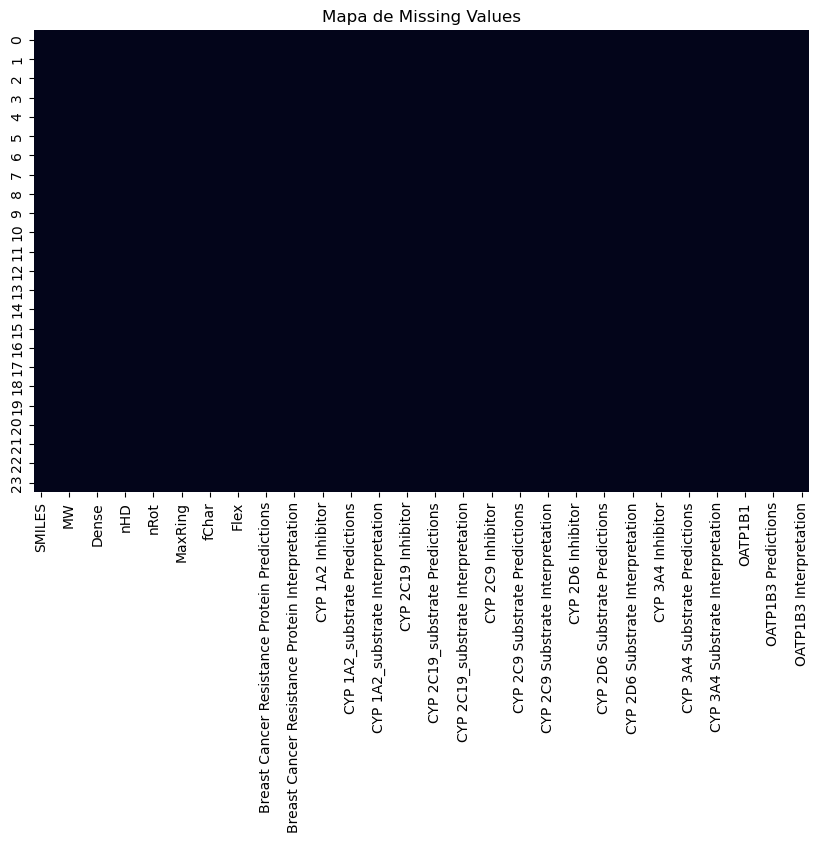


===== DESCRIPTIVE STATS =====


,MW,Vol,Dense,nHA,nHD,TPSA,nRot,nRing,MaxRing,nHet,...,CYP 2C19 Inhibitor,CYP 2C19_substrate,CYP 2C9 Inhibitor,CYP 2C9 Substrate,CYP 2D6 Inhibitor,CYP 2D6 Substrate,CYP 3A4 Inhibitor,CYP 3A4 Substrate,OATP1B1,OATP1B3
count,24.000000,24.000000,24.000000,24.000000,24.000000,24.00000,24.000000,24.000000,24.000000,24.000000,...,24.000000,24.000000,24.000000,24.0,24.000000,24.000000,24.000000,24.000000,24.000000,24.000000
mean,431.697500,417.276202,1.033681,8.333333,3.875000,135.87500,1.500000,4.916667,4.958333,8.333333,...,0.005500,0.421250,0.006583,0.0,0.079583,0.166917,0.093292,0.774083,0.324542,0.209292
std,65.362934,59.321584,0.030793,2.035910,1.596532,32.12455,1.793709,0.583592,6.849177,2.035910,...,0.005611,0.059291,0.015410,0.0,0.184489,0.026714,0.144512,0.179682,0.104093,0.096169
min,364.190000,365.082312,0.968092,5.000000,2.000000,83.83000,0.000000,4.000000,0.000000,5.000000,...,0.000000,0.301000,0.000000,0.0,0.000000,0.131000,0.002000,0.283000,0.122000,0.097000
25%,379.677500,372.567865,1.011962,7.000000,3.000000,112.50000,0.000000,5.000000,0.000000,7.000000,...,0.001000,0.376500,0.000000,0.0,0.000000,0.146000,0.012250,0.699000,0.279750,0.149250
50%,396.180000,376.742766,1.045668,8.000000,4.000000,135.10000,0.500000,5.000000,0.000000,8.000000,...,0.003500,0.416000,0.000000,0.0,0.000000,0.161500,0.031000,0.799000,0.299000,0.173500
75%,482.220000,468.937558,1.053604,9.000000,4.000000,142.75000,3.000000,5.000000,8.500000,9.000000,...,0.009250,0.451500,0.001500,0.0,0.005000,0.189500,0.096000,0.899750,0.407000,0.245750
max,558.230000,527.418184,1.082023,13.000000,8.000000,215.83000,6.000000,6.000000,16.000000,13.000000,...,0.018000,0.530000,0.063000,0.0,0.652000,0.216000,0.637000,0.964000,0.542000,0.485000


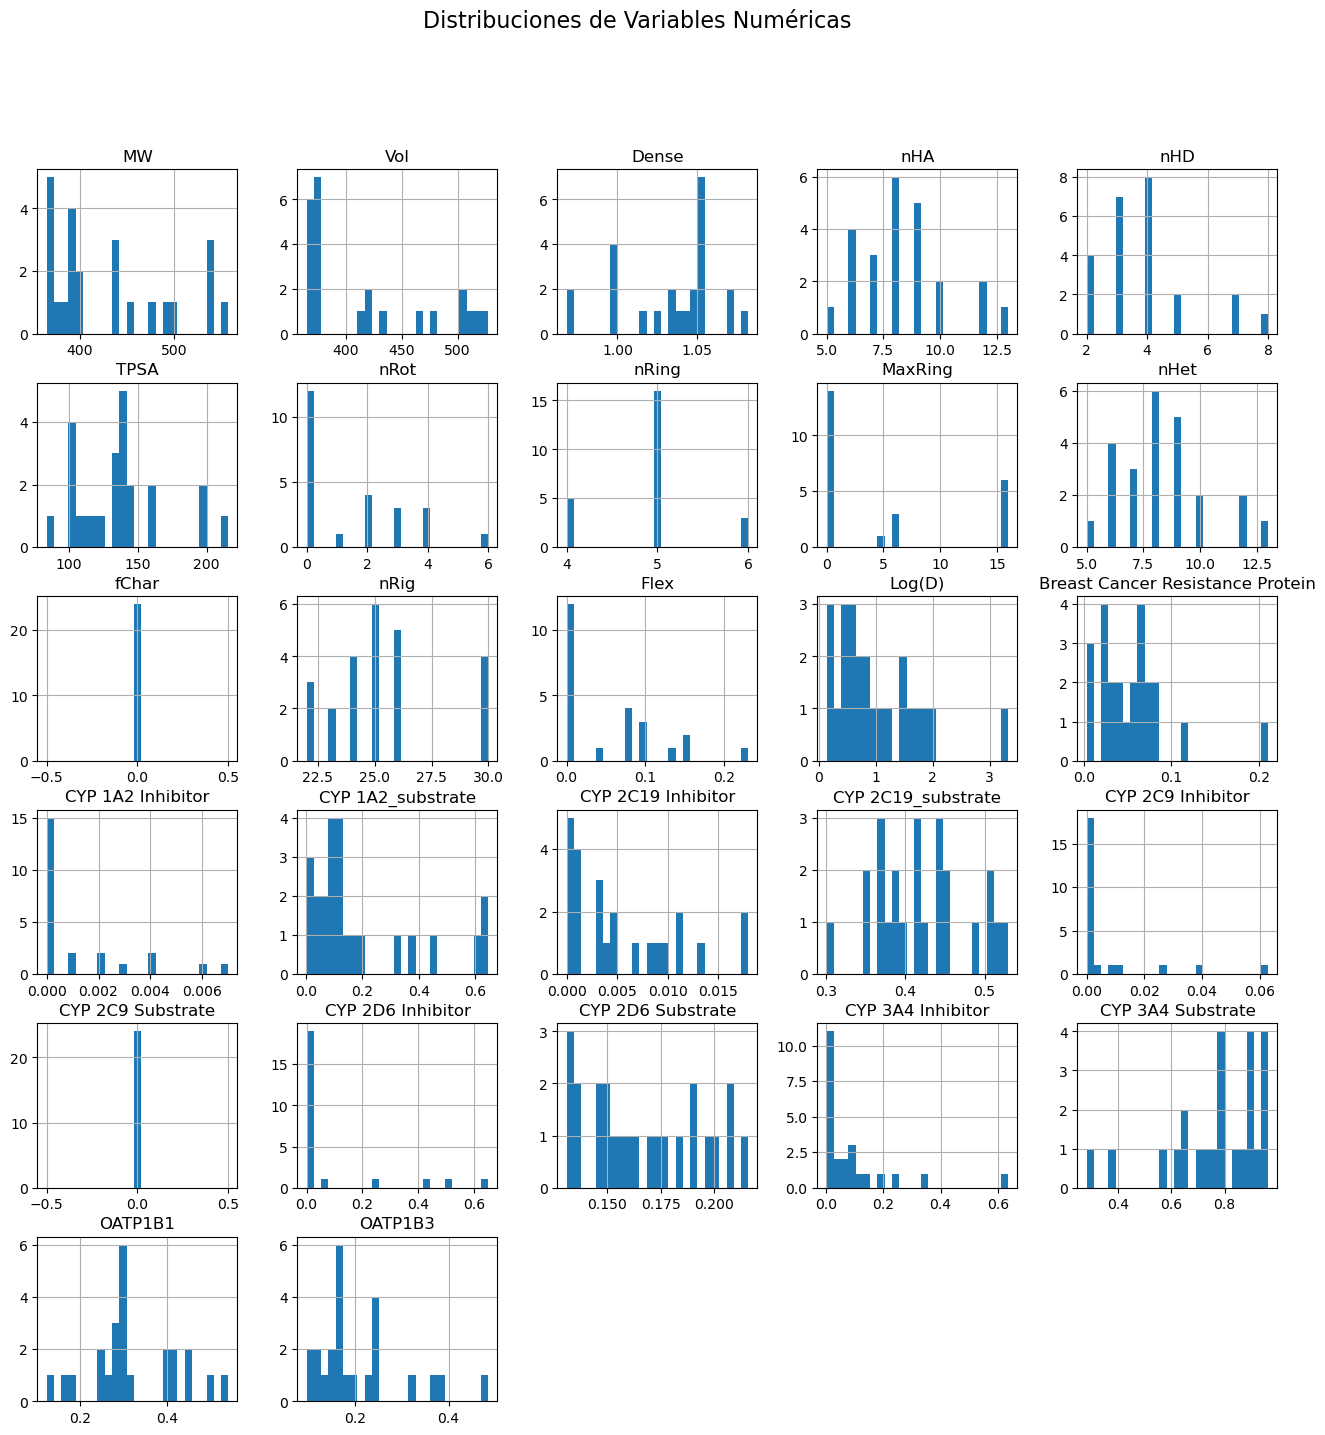

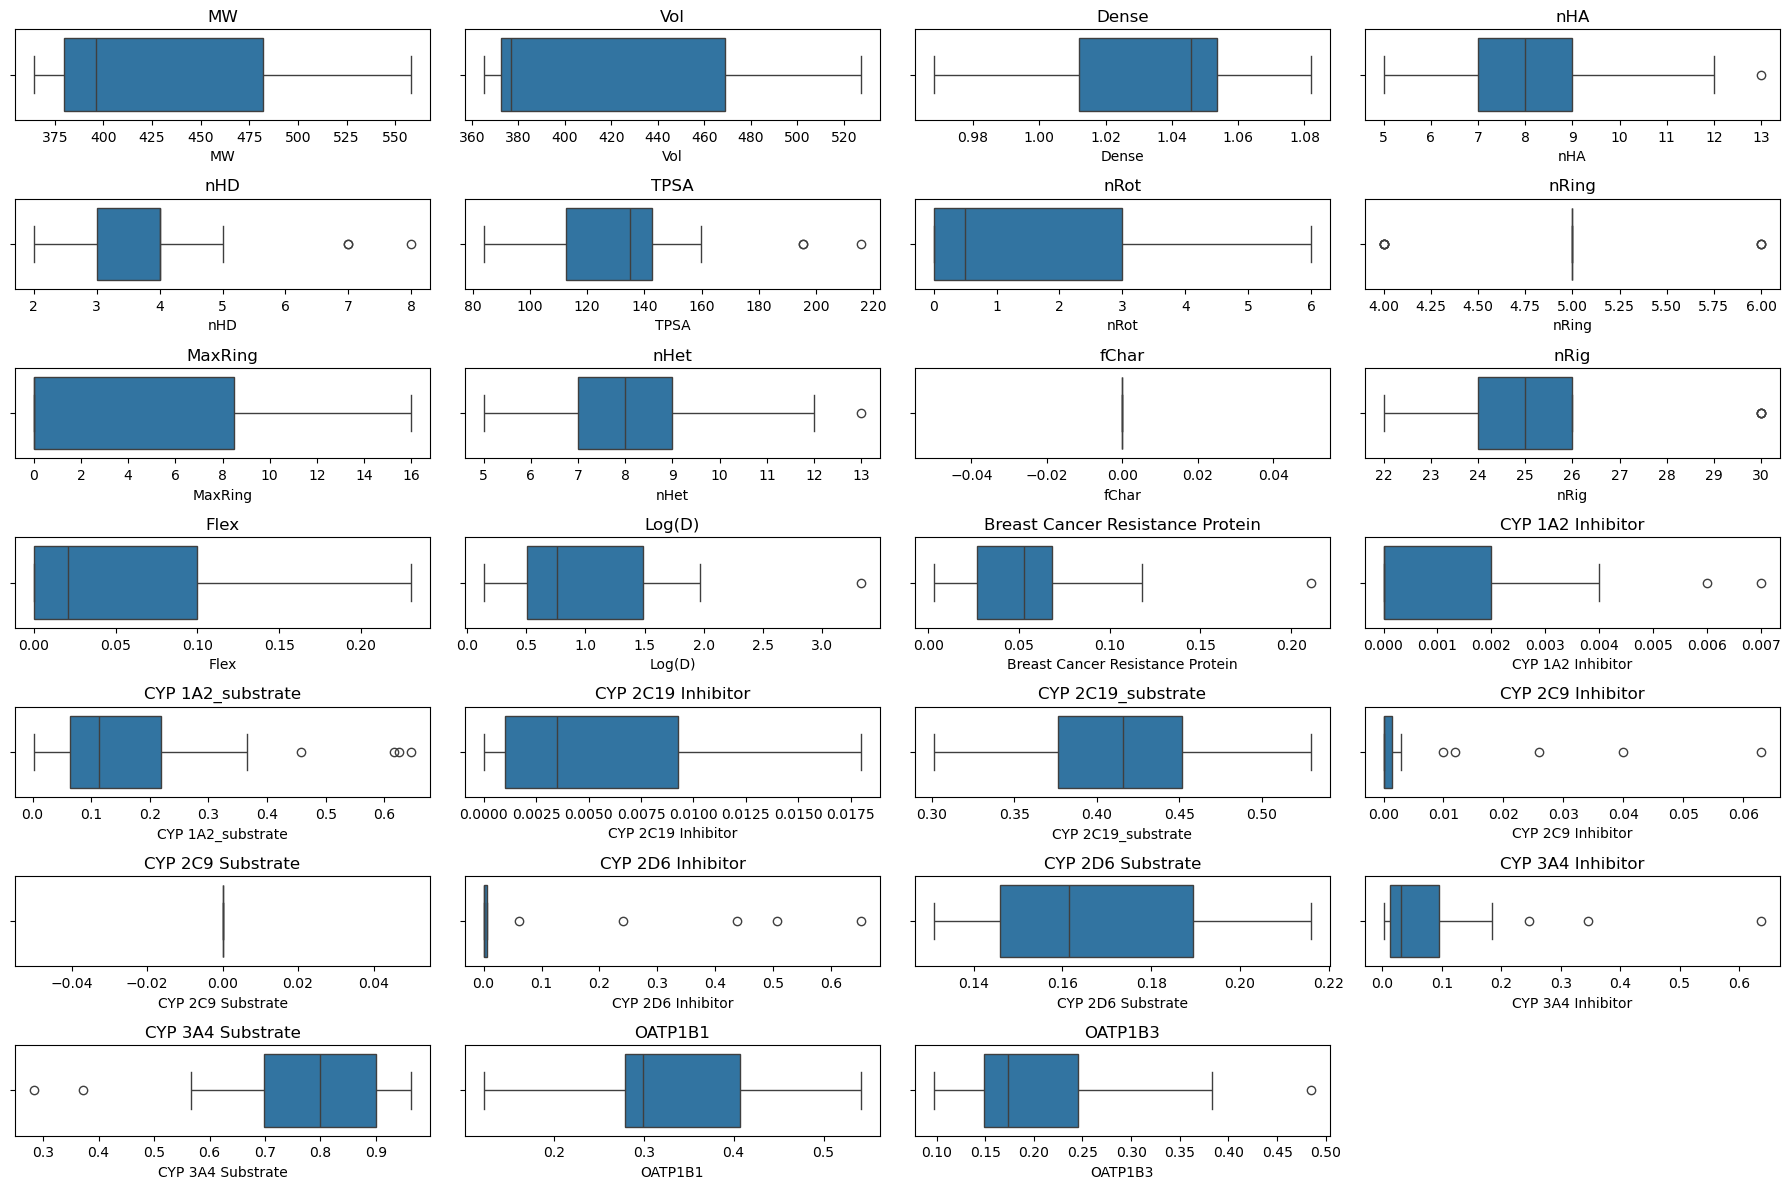

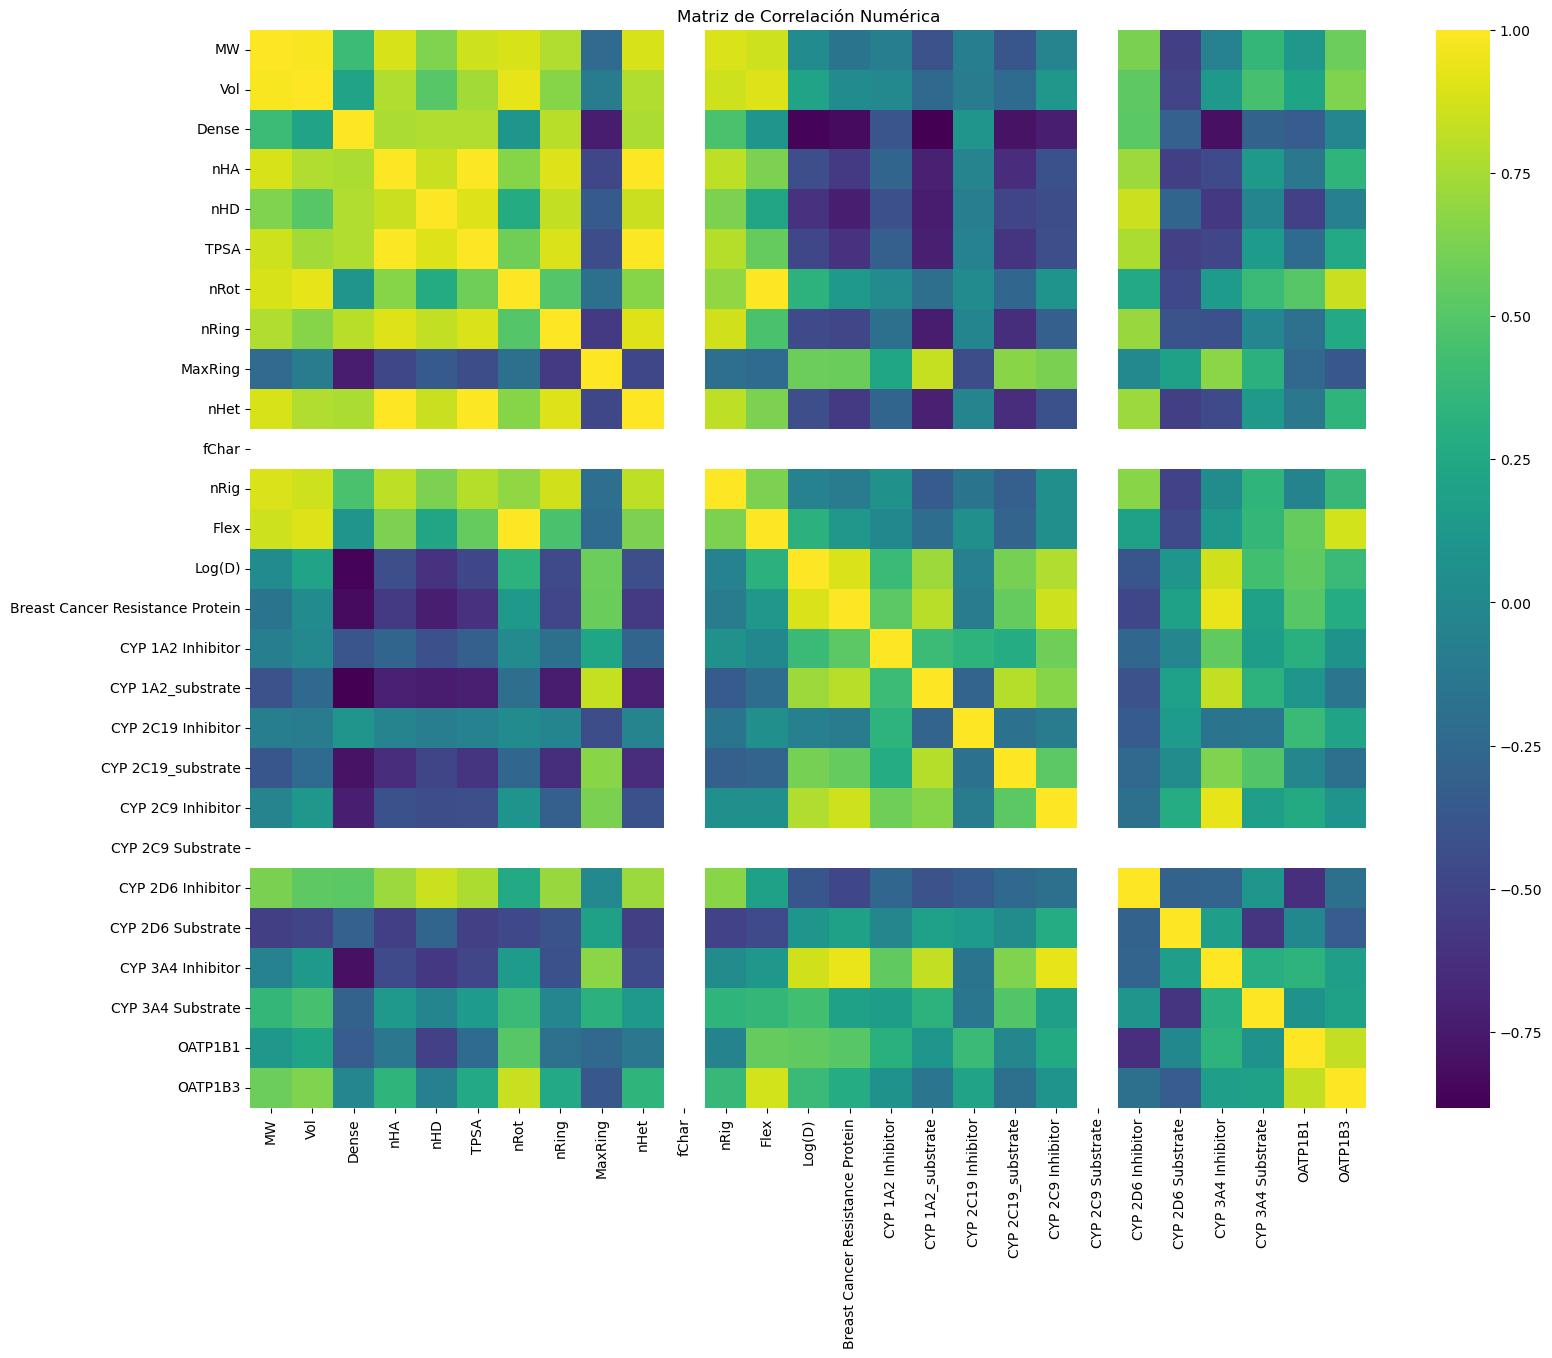

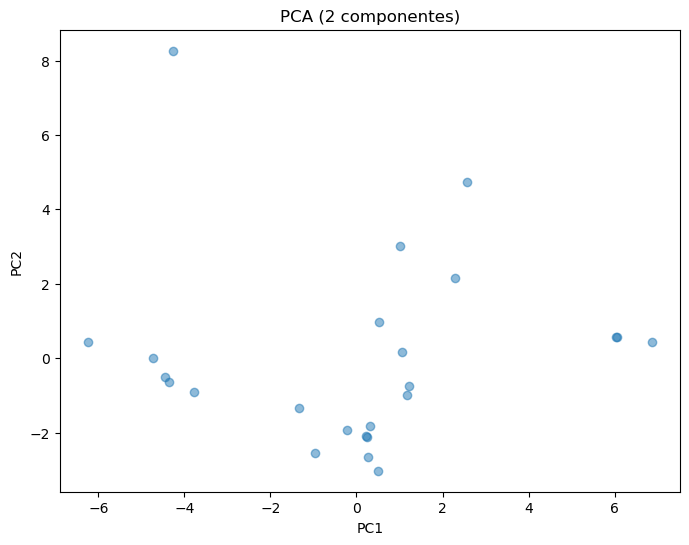


Varianza explicada por PCA:
[0.4548853  0.24981517]

===== COLUMNAS DE METABOLISMO =====
0 columnas detectadas
[]


<Figure size 1400x0 with 0 Axes>


===== OUTLIERS RESUMEN (IQR) =====
MW: 0 outliers
Vol: 0 outliers
Dense: 0 outliers
nHA: 1 outliers
nHD: 3 outliers
TPSA: 3 outliers
nRot: 0 outliers
nRing: 8 outliers
MaxRing: 0 outliers
nHet: 1 outliers
fChar: 0 outliers
nRig: 4 outliers
Flex: 0 outliers
Log(D): 1 outliers
Breast Cancer Resistance Protein: 1 outliers
CYP 1A2 Inhibitor: 2 outliers
CYP 1A2_substrate: 4 outliers
CYP 2C19 Inhibitor: 0 outliers
CYP 2C19_substrate: 0 outliers
CYP 2C9 Inhibitor: 5 outliers
CYP 2C9 Substrate: 0 outliers
CYP 2D6 Inhibitor: 5 outliers
CYP 2D6 Substrate: 0 outliers
CYP 3A4 Inhibitor: 3 outliers
CYP 3A4 Substrate: 2 outliers
OATP1B1: 0 outliers
OATP1B3: 1 outliers


In [60]:
# ============================================
#   EDA AUTOMÁTICO PARA DATAFRAME "met"
# ============================================

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA

# ================================================
# 0. DATAFRAME DE ENTRADA
# ================================================
# Asegúrate de ya tener cargado df_met
print("===== INICIO DEL EDA =====")


# ================================================
# 1. DIMENSIONES Y TIPOS
# ================================================
print("\n===== SHAPE =====")
print(df_met.shape)

print("\n===== TIPOS =====")
print(df_met.dtypes)


# ================================================
# 2. VALORES FALTANTES
# ================================================
print("\n===== MISSING VALUES =====")
missing = df_met.isna().sum().sort_values(ascending=False)
print(missing[missing > 0])

plt.figure(figsize=(10,6))
sns.heatmap(df_met.isna(), cbar=False)
plt.title("Mapa de Missing Values")
plt.show()


# ================================================
# 3. ESTADÍSTICOS DESCRIPTIVOS
# ================================================
print("\n===== DESCRIPTIVE STATS =====")
display(df_met.describe())


# ================================================
# 4. HISTOGRAMAS
# ================================================
num_cols = df_met.select_dtypes(include=np.number).columns

df_met[num_cols].hist(bins=25, figsize=(16,16))
plt.suptitle("Distribuciones de Variables Numéricas", fontsize=16)
plt.show()


# ================================================
# 5. BOXPLOTS (Outliers visuales)
# ================================================
plt.figure(figsize=(18, 12))
for i, col in enumerate(num_cols, 1):
    plt.subplot((len(num_cols) // 4) + 1, 4, i)
    sns.boxplot(x=df_met[col])
    plt.title(col)

plt.tight_layout()
plt.show()


# ================================================
# 6. HEATMAP DE CORRELACIÓN
# ================================================
plt.figure(figsize=(18, 14))
corr = df_met[num_cols].corr()
sns.heatmap(corr, cmap='viridis')
plt.title("Matriz de Correlación Numérica")
plt.show()


# ================================================
# 7. PCA
# ================================================
X = df_met[num_cols].fillna(df_met[num_cols].mean())
X_scaled = StandardScaler().fit_transform(X)

pca = PCA(n_components=2)
pca_comp = pca.fit_transform(X_scaled)

plt.figure(figsize=(8,6))
plt.scatter(pca_comp[:, 0], pca_comp[:, 1], alpha=0.5)
plt.xlabel("PC1")
plt.ylabel("PC2")
plt.title("PCA (2 componentes)")
plt.show()

print("\nVarianza explicada por PCA:")
print(pca.explained_variance_ratio_)


# ================================================
# 8. ANÁLISIS ESPECÍFICO DE COLUMNAS DE METABOLISMO
# ================================================
metabolism_cols = [col for col in df_met.columns if col.startswith('[Metabolism/')]

print("\n===== COLUMNAS DE METABOLISMO =====")
print(len(metabolism_cols), "columnas detectadas")
print(metabolism_cols)


# Conteo de categorías (solo para columnas categóricas)
for col in metabolism_cols:
    if df_met[col].dtype == "object":
        print(f"\n--- {col} ---")
        print(df_met[col].value_counts(dropna=False))


# Graficar distribuciones categóricas tipo Yes/No
cat_cols = [c for c in metabolism_cols if df_met[c].dtype == "object"]

plt.figure(figsize=(14, len(cat_cols)*3))
for i, col in enumerate(cat_cols, 1):
    plt.subplot(len(cat_cols), 1, i)
    df_met[col].value_counts().plot(kind='bar')
    plt.title(col)

plt.tight_layout()
plt.show()


# ================================================
# 9. DETECCIÓN RÁPIDA DE OUTLIERS (IQR)
# ================================================
print("\n===== OUTLIERS RESUMEN (IQR) =====")
for col in num_cols:
    Q1 = df_met[col].quantile(0.25)
    Q3 = df_met[col].quantile(0.75)
    IQR = Q3 - Q1
    outliers = df_met[(df_met[col] < Q1 - 1.5*IQR) | (df_met[col] > Q3 + 1.5*IQR)]
    print(f"{col}: {len(outliers)} outliers")


Columnas detectadas: 30
['CYP 1A2 Inhibitor Predictions', 'CYP 1A2 Inhibitor', 'CYP 1A2 Inhibitor Interpretation', 'CYP 1A2_substrate Predictions', 'CYP 1A2_substrate', 'CYP 1A2_substrate Interpretation', 'CYP 2C19 Inhibitor Predictions', 'CYP 2C19 Inhibitor', 'CYP 2C19 Inhibitor Interpretation', 'CYP 2C19_substrate Predictions', 'CYP 2C19_substrate', 'CYP 2C19_substrate Interpretation', 'CYP 2C9 Inhibitor Predictions', 'CYP 2C9 Inhibitor', 'CYP 2C9 Inhibitor Interpretation', 'CYP 2C9 Substrate Predictions', 'CYP 2C9 Substrate', 'CYP 2C9 Substrate Interpretation', 'CYP 2D6 Inhibitor Predictions', 'CYP 2D6 Inhibitor', 'CYP 2D6 Inhibitor Interpretation', 'CYP 2D6 Substrate Predictions', 'CYP 2D6 Substrate', 'CYP 2D6 Substrate Interpretation', 'CYP 3A4 Inhibitor Predictions', 'CYP 3A4 Inhibitor', 'CYP 3A4 Inhibitor Interpretation', 'CYP 3A4 Substrate Predictions', 'CYP 3A4 Substrate', 'CYP 3A4 Substrate Interpretation']

Columnas con valores > 0.5:
['CYP 1A2_substrate', 'CYP 2C19_substrat

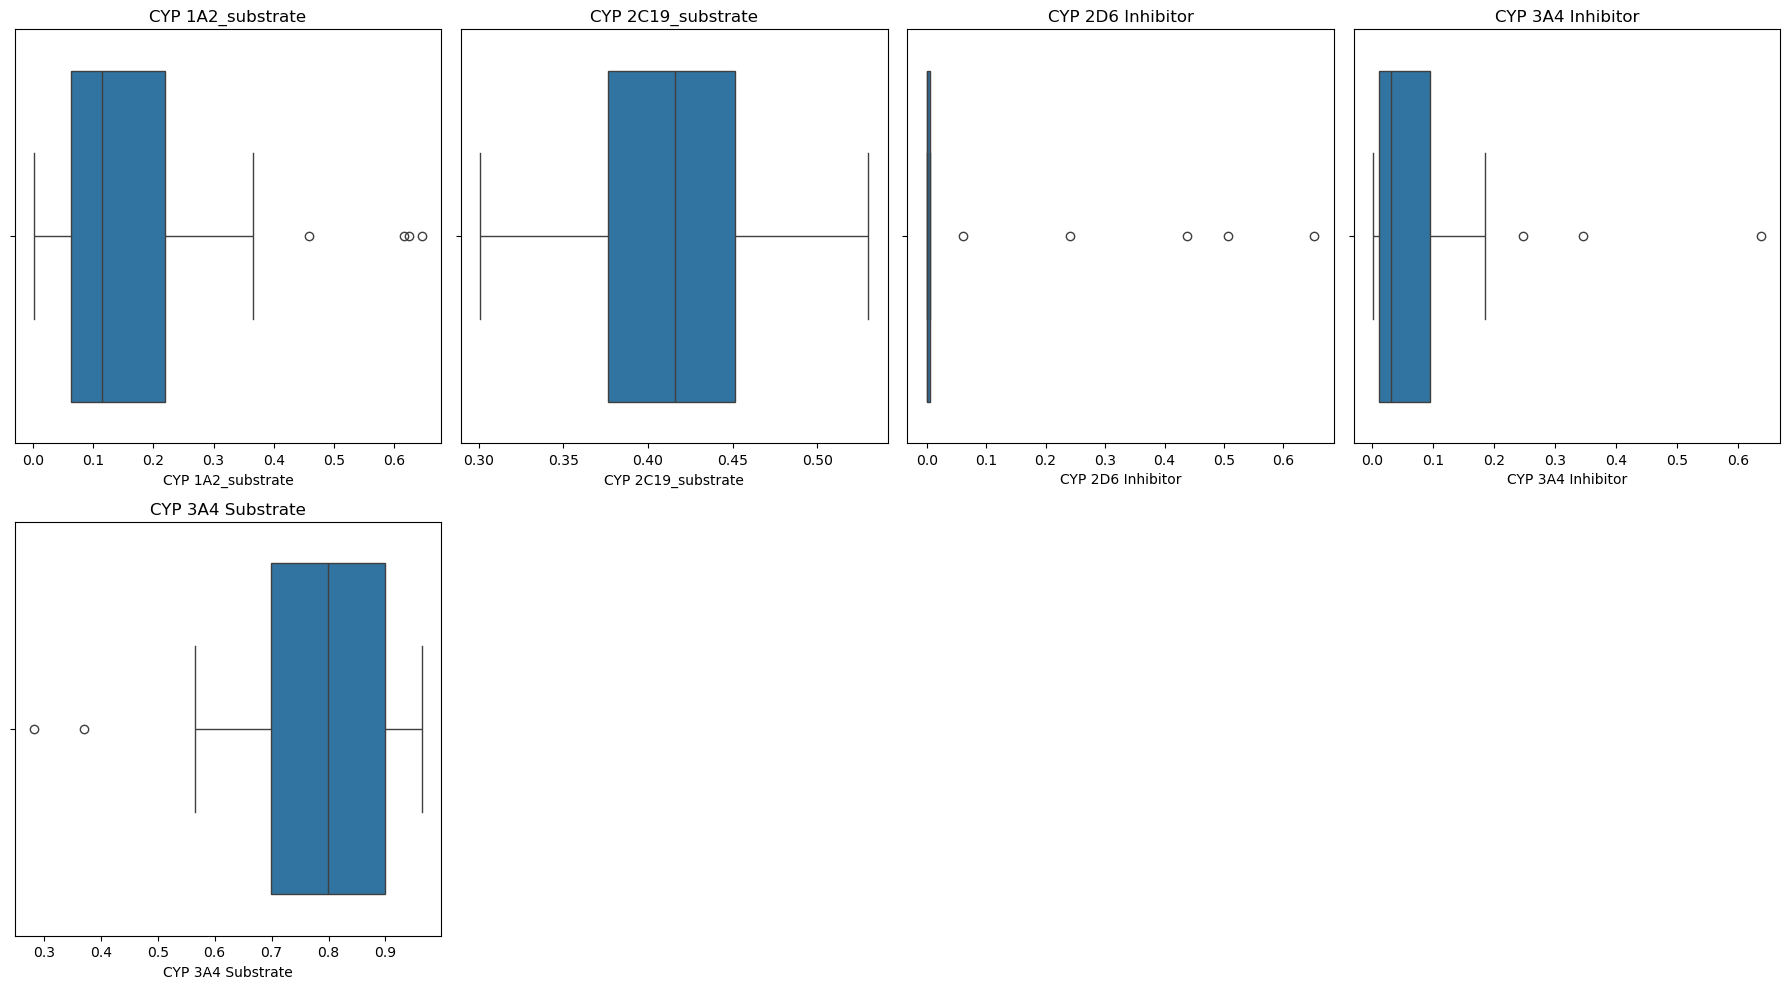

In [61]:
import matplotlib.pyplot as plt
import seaborn as sns

# -----------------------------------------
# 1. Seleccionar columnas tipo Metabolism
# -----------------------------------------
met_cols = [col for col in df_met.columns if col.startswith("CYP")]

print(f"Columnas detectadas: {len(met_cols)}")
print(met_cols)

# -----------------------------------------
# 2. Filtrar por valores > 0.5
# -----------------------------------------
filtered_cols = []

for col in met_cols:
    # Verificar columnas numéricas
    if df_met[col].dtype != 'object':
        if (df_met[col] > 0.5).any():     # si tiene algún valor > 0.5
            filtered_cols.append(col)

print("\nColumnas con valores > 0.5:")
print(filtered_cols)

# -----------------------------------------
# 3. Boxplots de columnas filtradas
# -----------------------------------------
if len(filtered_cols) == 0:
    print("\nNo hay columnas con valores > 0.5.")
else:
    rows = (len(filtered_cols) // 4) + 1

    plt.figure(figsize=(18, 5 * rows))
    for i, col in enumerate(filtered_cols, 1):
        plt.subplot(rows, 4, i)
        sns.boxplot(x=df_met[col])
        plt.title(col)
    plt.tight_layout()
    plt.show()


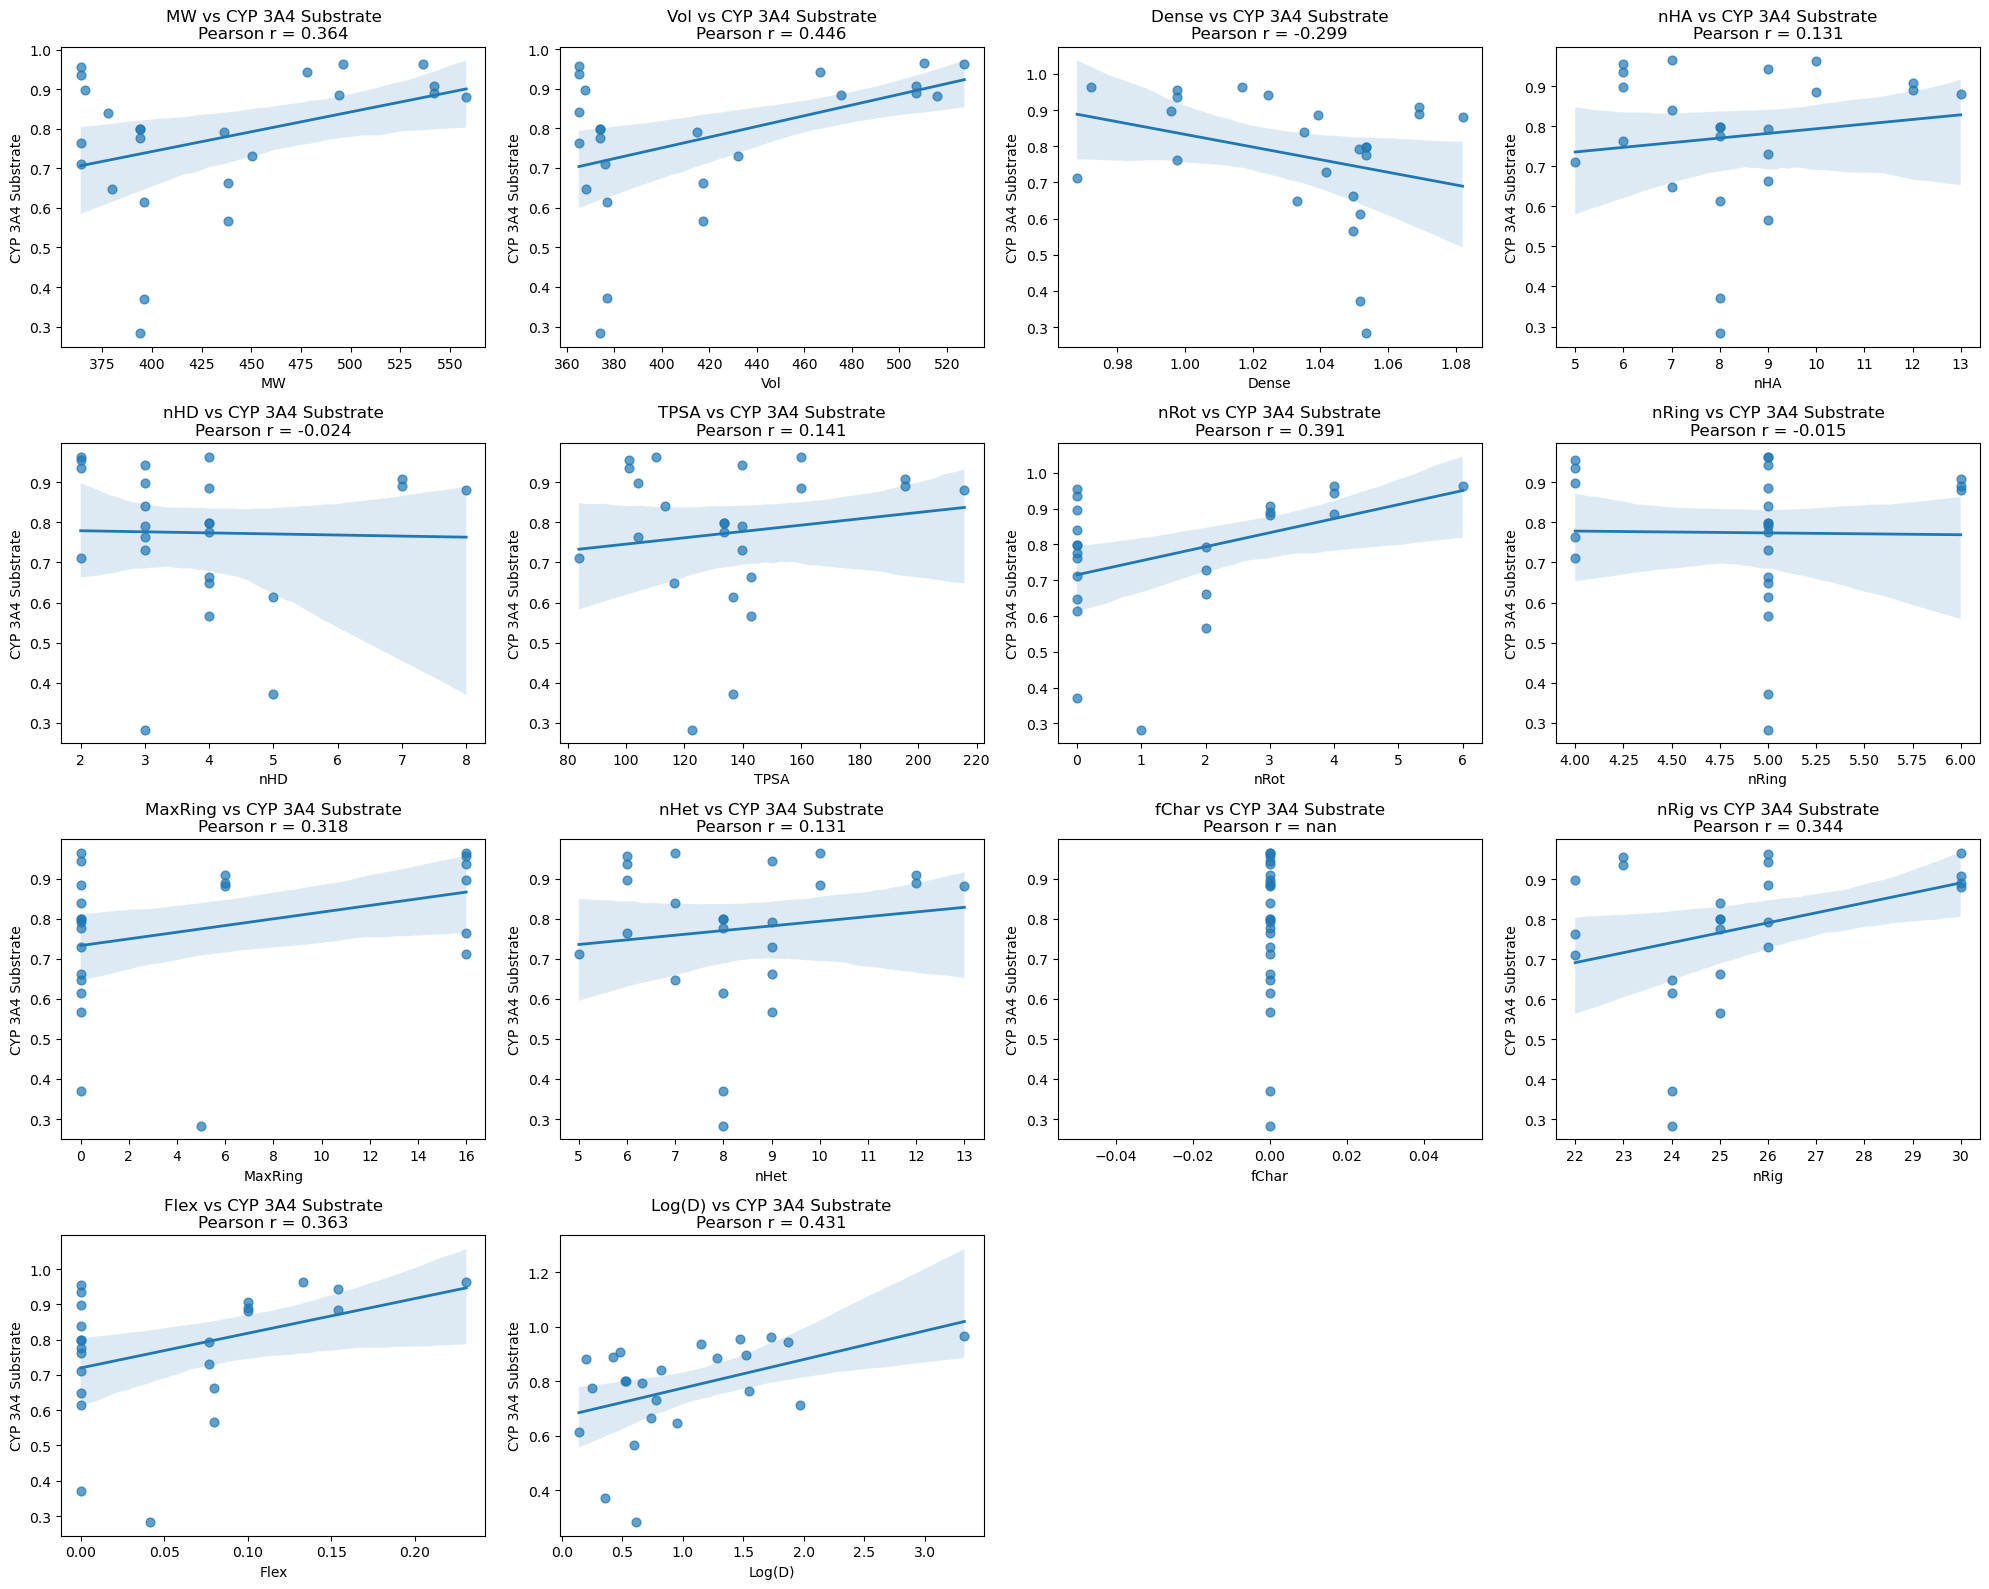

In [65]:
import matplotlib.pyplot as plt
import seaborn as sns

# Tus columnas
cols = [
    'MW', 'Vol', 'Dense', 'nHA', 'nHD', 'TPSA',
    'nRot', 'nRing', 'MaxRing', 'nHet', 'fChar',
    'nRig', 'Flex', 'Log(D)'
]

cyp_col = 'CYP 3A4 Substrate'  # tu columna numérica

# Número de filas dinámico
rows = (len(cols) // 4) + 1

plt.figure(figsize=(20, rows * 4))

for i, col in enumerate(cols, 1):
    plt.subplot(rows, 4, i)

    # Scatter + Regresión
    sns.regplot(
        x=df_met[col],
        y=df_met[cyp_col],
        scatter_kws={'s': 40, 'alpha': 0.7},
        line_kws={'linewidth': 2},
    )

    # Correlación Pearson
    corr = df_met[[col, cyp_col]].corr().iloc[0, 1]

    plt.title(f"{col} vs {cyp_col}\nPearson r = {corr:.3f}")
    plt.xlabel(col)
    plt.ylabel(cyp_col)

plt.tight_layout()
plt.show()

C:\Users\Usuario X\anaconda3\envs\fac\Lib\site-packages\seaborn\axisgrid.py:1513: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  func(x=vector, **plot_kwargs)
C:\Users\Usuario X\anaconda3\envs\fac\Lib\site-packages\seaborn\axisgrid.py:1513: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  func(x=vector, **plot_kwargs)
C:\Users\Usuario X\anaconda3\envs\fac\Lib\site-packages\seaborn\axisgrid.py:1513: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  func(x=vector, **plot_kwargs)
C:\Users\Usuario X\anaconda3\envs\fac\Lib\site-packages\seaborn\axisgrid.py:1513: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an erro

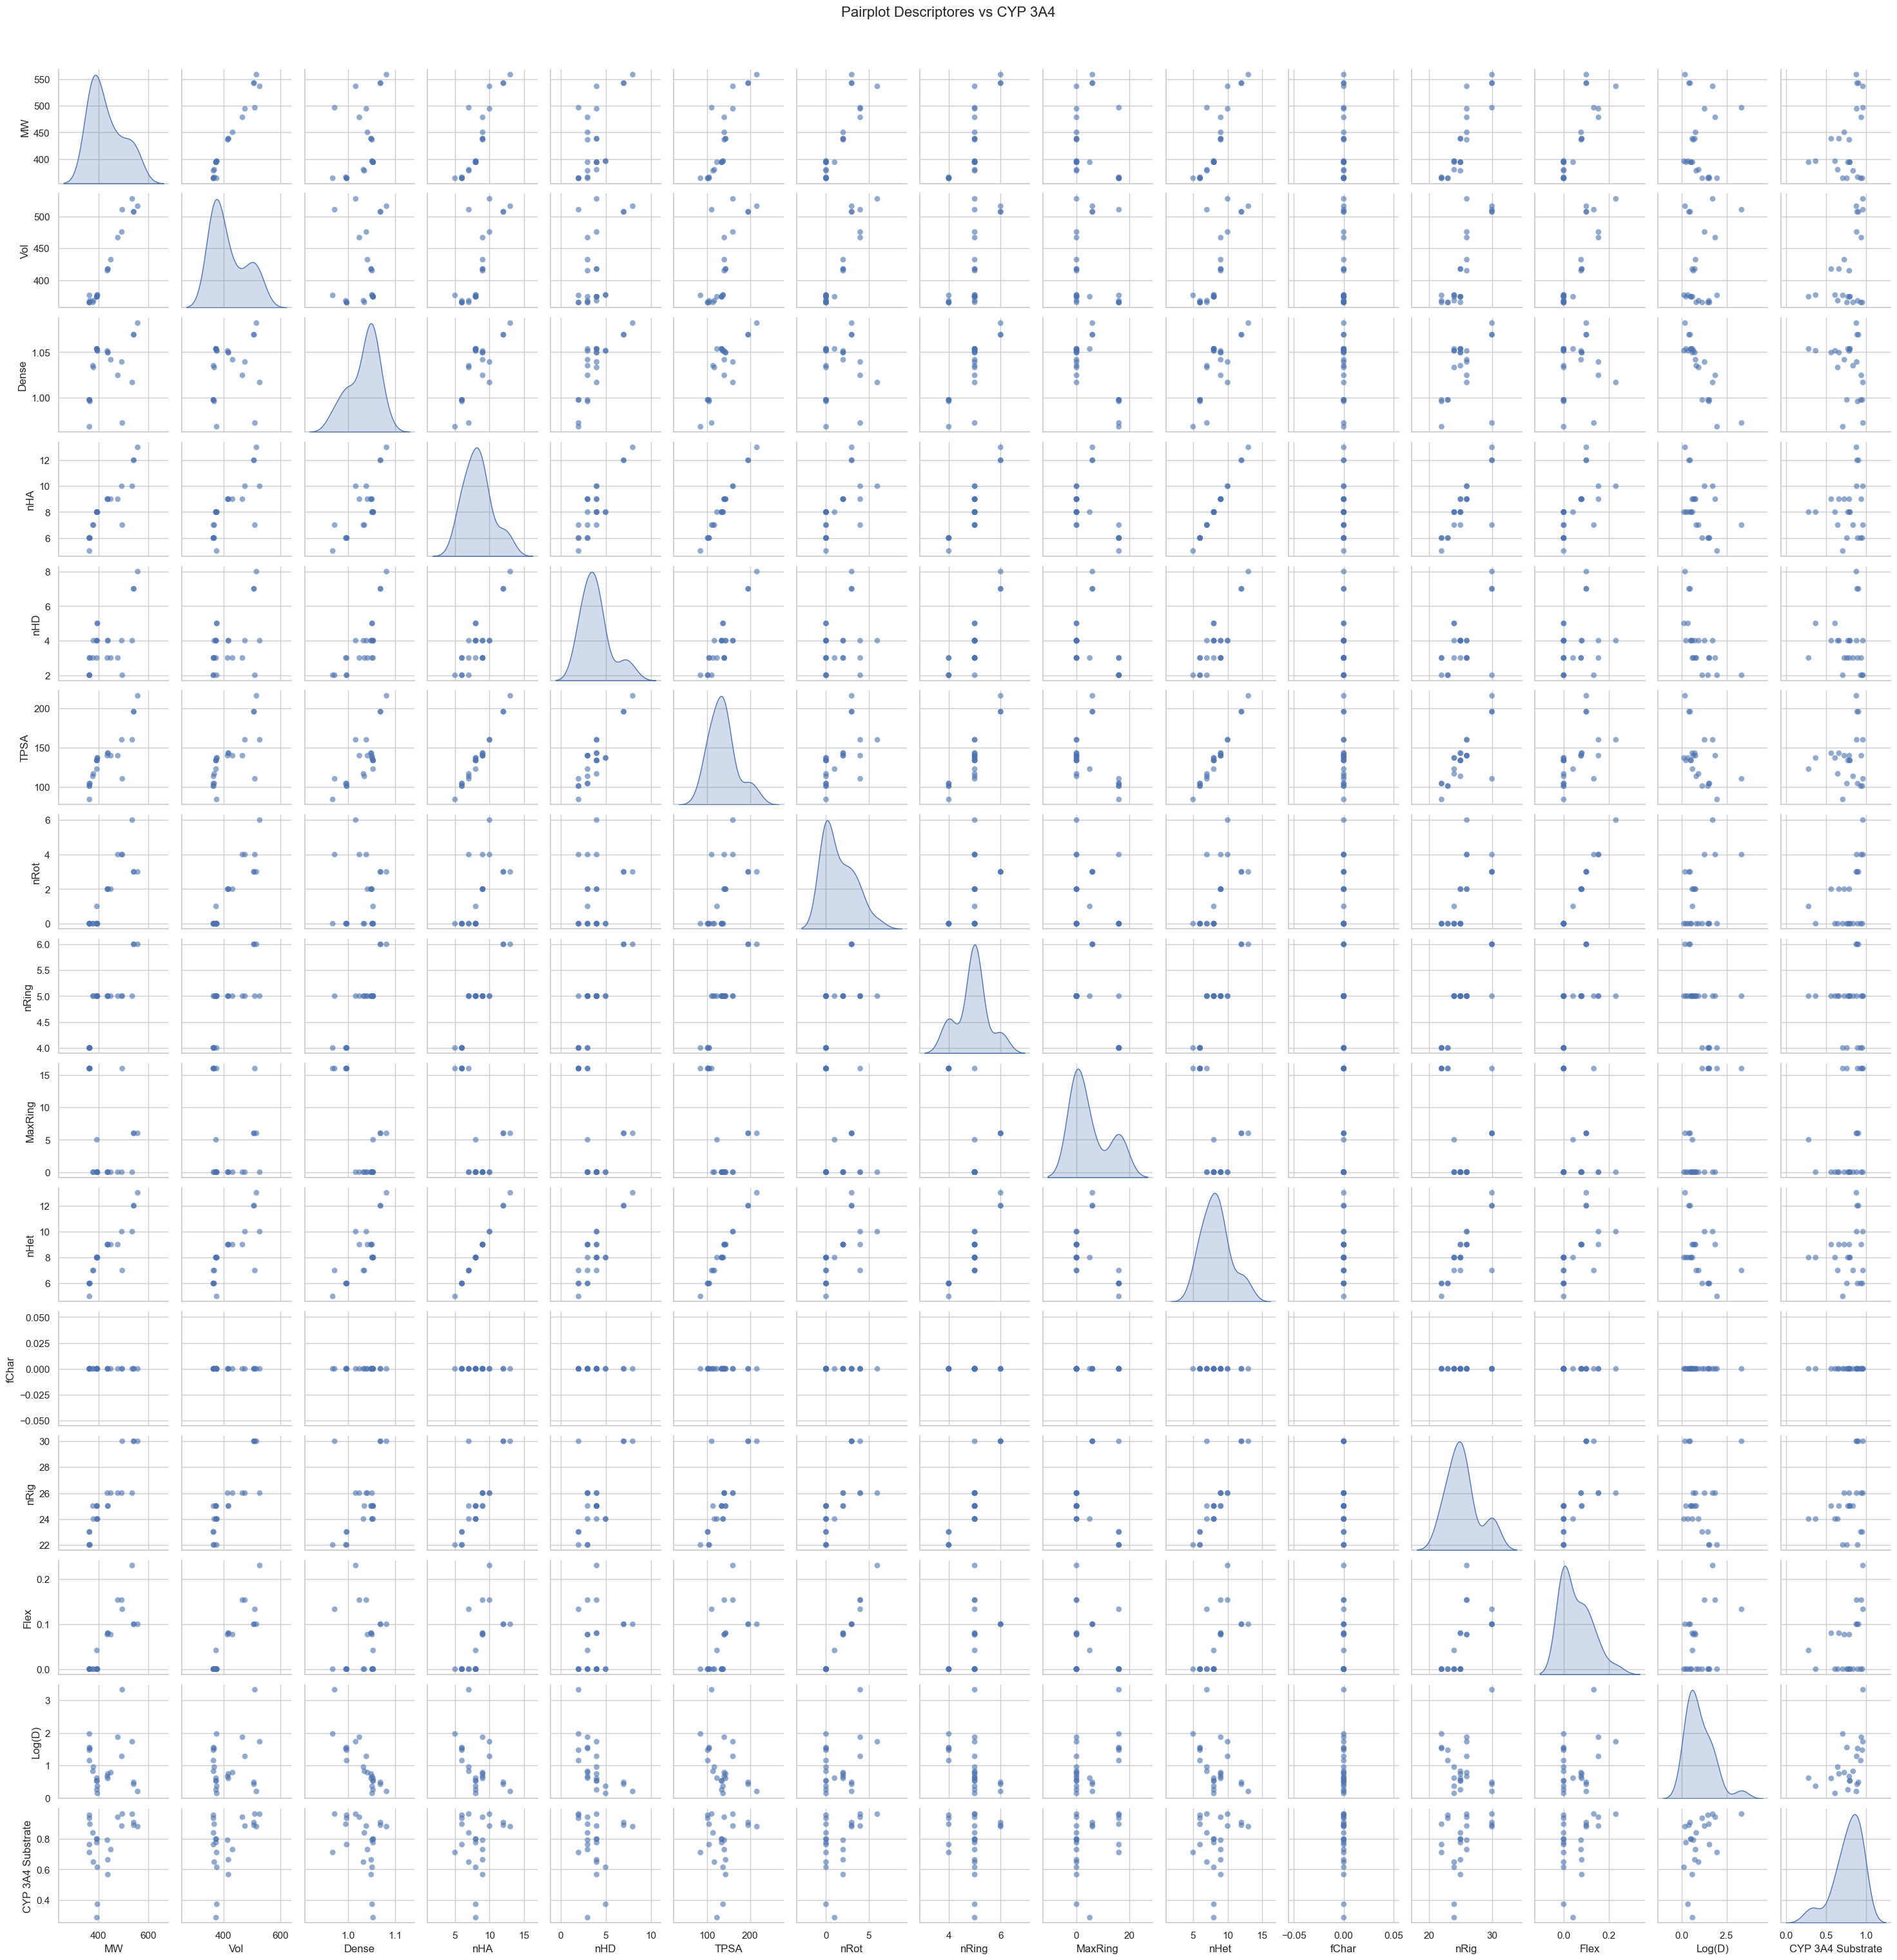

In [67]:
import seaborn as sns
import matplotlib.pyplot as plt

sns.set_theme(style="whitegrid")

pair = sns.pairplot(
    df_met[cols + [cyp_col]],
    diag_kind="kde",            # mejores densidades en diagonal
    plot_kws={"alpha": 0.6, "s": 40, "edgecolor": "none"},
    diag_kws={"shade": True},
    corner=False,               # si quieres solo la mitad inferior → True
    height=2.0                  # cambia tamaño general
)

pair.fig.suptitle("Pairplot Descriptores vs CYP 3A4",
                  y=1.02, fontsize=16)

plt.show()